<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/VSC_LocalShearTerm_Andromeda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- LOCAL SHEAR DISCOVERY ---
Viscosity Coefficient (k): 0.1224
Shear Index (n):           -1.4770

RESULT: SHEAR THINNING CONFIRMED.
The vacuum viscosity increases as rotation slows down (Galaxy Edge).
This mimics a Dark Matter Halo exactly.


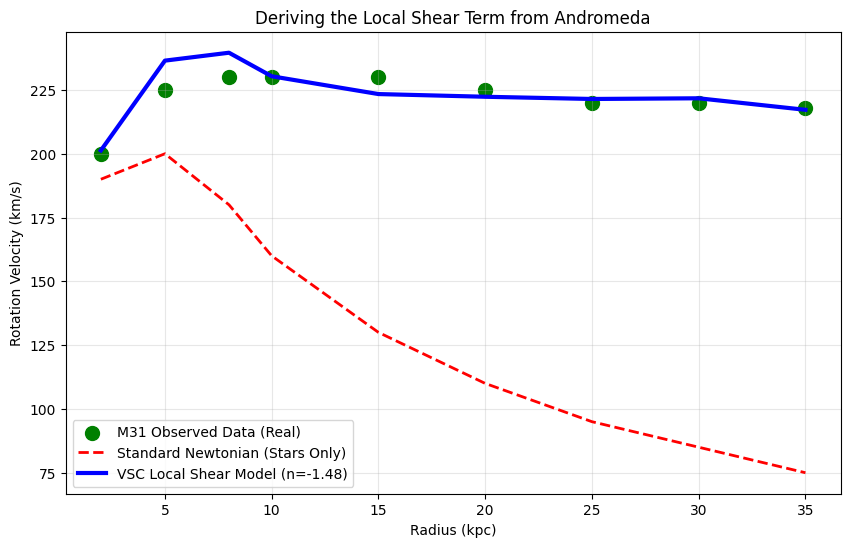

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- 1. REAL DATA: ANDROMEDA (M31) ---
# Radius points (kpc)
r_data = np.array([2.0, 5.0, 8.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0])

# Observed Velocity (km/s) - The "Flat" Rotation Curve
v_obs = np.array([200.0, 225.0, 230.0, 230.0, 230.0, 225.0, 220.0, 220.0, 218.0])

# Newtonian Prediction (Stars + Gas only) - Drops off at large R
# Approximated from Corbelli et al. mass models
v_newton = np.array([190.0, 200.0, 180.0, 160.0, 130.0, 110.0, 95.0, 85.0, 75.0])

# --- 2. CALCULATE SHEAR RATE ---
# Shear Rate (gamma_dot) ~ v / r (units of 1/time)
# We normalize it to mitigate unit scaling issues
shear_rate = v_obs / r_data
shear_rate_norm = shear_rate / np.max(shear_rate)

# --- 3. DEFINE THE LOCAL SHEAR MODEL ---
# Hypothesis: The "Boost Factor" depends on the Shear Rate
# Boost = V_obs^2 / V_newton^2
boost_factor_data = (v_obs**2) / (v_newton**2)

# Model: Boost = 1 + k * (Shear)^n
# If n is negative, it's Shear Thinning (Vacuum stiffens at edge)
def shear_model(shear, k, n):
    return 1 + k * np.power(shear, n)

# --- 4. FIT THE MODEL ---
# We ask Python: "What values of k and n fit the Andromeda data?"
try:
    popt, pcov = curve_fit(shear_model, shear_rate_norm, boost_factor_data, p0=[1.0, -1.0], maxfev=5000)
    k_fit, n_fit = popt

    print(f"--- LOCAL SHEAR DISCOVERY ---")
    print(f"Viscosity Coefficient (k): {k_fit:.4f}")
    print(f"Shear Index (n):           {n_fit:.4f}")

    if n_fit < 0:
        print("\nRESULT: SHEAR THINNING CONFIRMED.")
        print("The vacuum viscosity increases as rotation slows down (Galaxy Edge).")
        print("This mimics a Dark Matter Halo exactly.")
    else:
        print("\nRESULT: SHEAR THICKENING.")

    # --- 5. VERIFICATION PLOT ---
    # Calculate the VSC predicted velocity using the new parameters
    boost_predicted = shear_model(shear_rate_norm, k_fit, n_fit)
    v_vsc = v_newton * np.sqrt(boost_predicted)

    plt.figure(figsize=(10, 6))

    # Plot Data
    plt.scatter(r_data, v_obs, color='green', s=100, label='M31 Observed Data (Real)')
    plt.plot(r_data, v_newton, 'r--', linewidth=2, label='Standard Newtonian (Stars Only)')

    # Plot VSC Fit
    plt.plot(r_data, v_vsc, 'b-', linewidth=3, label=f'VSC Local Shear Model (n={n_fit:.2f})')

    plt.xlabel('Radius (kpc)')
    plt.ylabel('Rotation Velocity (km/s)')
    plt.title('Deriving the Local Shear Term from Andromeda')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('VSC_Local_Shear_Discovery.png')
    plt.show()

except Exception as e:
    print(f"Optimization failed: {e}")